<a href="https://colab.research.google.com/github/elfabry88/SIM_YAC_SUAREZ_UPSE2023/blob/main/ExplicitaeImplicitaPresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import math

In [2]:
L=30000
dx=250
Tiempo=100000
DT=1
K=50 # Permeabilidad en mD
Por=0.5
vis=1 # Viscosidad en Centipoise
Beta=0.7 #Factor volumetrico
CompTotal= 1.2**-6 #Compresibilidad Total en psi**-1
A=200000 #Area ft2

In [3]:
Alpha=K/(vis*Por*CompTotal)
Alpha
Eta=Alpha*DT/dx**2
Eta

0.004777574399999999

In [4]:
#ESQUEMA EXPLICITO
def Presdt(P0,P1,P2,Eta):
  Pdt=P1+Eta*(P0-(2*P1)+P2)
  return(Pdt)

Pexplicita=np.zeros((Tiempo//DT,L//dx)) #Crear Matriz vacia que guardara los resultados

In [5]:
#Condiciones iniciales
Pyac=2000
Piz=0
Pder=1000
Pin=np.ones(L//dx)
Pres=np.zeros(L//dx)
Pres2=np.zeros(L//dx)
Pin=Pin*Pyac
Pin[0]=Piz
Pin[len(Pin)-1]=Pder
Pin

array([   0., 2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000.,
       2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000.,
       2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000.,
       2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000.,
       2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000.,
       2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000.,
       2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000.,
       2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000.,
       2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000.,
       2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000.,
       2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000.,
       2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000.,
       2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000.,
       2000., 2000., 1000.])

In [6]:
t=DT
Pexplicita[0]=Pin #los valores de la columna [0] van a guardarse los valores de Pin
while t<Tiempo:
  for i in range(0,len(Pin)-1):
    if i==0:
      Pres[i]=Pin[0]
    elif i==len(Pin)-1:
      Pres[i]=Pin[len(Pin)-1]
    else:
      Pres[i]=Presdt(Pin[i-1],Pin[i],Pin[i+1],Eta)
  Pexplicita[t//DT]=Pres
  t=t+DT
  Pin=Pres

In [7]:
Pexplicita

array([[   0.        , 2000.        , 2000.        , ..., 2000.        ,
        2000.        , 1000.        ],
       [   0.        , 1990.4448512 , 2000.        , ..., 2000.        ,
        1995.2224256 ,    0.        ],
       [   0.        , 1980.98100327, 1999.90913533, ..., 1999.97717478,
        1985.71281819,    0.        ],
       ...,
       [   0.        ,   51.42966773,  102.80452509, ...,  102.80424661,
          51.4292698 ,    0.        ],
       [   0.        ,   51.42940587,  102.80400213, ...,  102.80372359,
          51.42900791,    0.        ],
       [   0.        ,   51.42914401,  102.80347918, ...,  102.80320058,
          51.42874603,    0.        ]])

In [8]:
#ESQUEMA IMPLICITO
Pimplicita=np.zeros((Tiempo//DT,L//dx))

Pin=np.ones(L//dx)
Pres=np.zeros(L//dx)
Pin=Pin*Pyac
Pin[0]=Piz
Pin[len(Pin)-1]=Pder
N=L//dx
Matriz_resolucion=np.zeros([N-2,N-2])

In [9]:
for i in range(N-2): #porque siempre se resta 2 al total de la matriz la cantidad de triangulos q tendremos
  Matriz_resolucion[i,i]=1+2*Eta #I es igual a J por eso se pone [i,i] - se llena la diagonal (1,2)(2,2)(3,3)(4,4)(5,5) etc
  if i>0:
    Matriz_resolucion[i,i-1]=-Eta #Llenar los valores a la izquierda de la diagonal con -Eta
  if i<(N-3):
    Matriz_resolucion[i,i+1]=-Eta #Llenar los valores a la derecha de la diagona N-2 no tiene valores a la derecha pero en N-3 si tiene valores y se pone -eta

In [10]:
Pcal=np.zeros([N-2]) #
Pcal=np.linalg.solve(Matriz_resolucion,Pin[1:-1])

In [11]:
Pcal

array([1990.53507596, 1999.95520761, 1999.99978802, 1999.999999  ,
       2000.        , 2000.        , 2000.        , 2000.        ,
       2000.        , 2000.        , 2000.        , 2000.        ,
       2000.        , 2000.        , 2000.        , 2000.        ,
       2000.        , 2000.        , 2000.        , 2000.        ,
       2000.        , 2000.        , 2000.        , 2000.        ,
       2000.        , 2000.        , 2000.        , 2000.        ,
       2000.        , 2000.        , 2000.        , 2000.        ,
       2000.        , 2000.        , 2000.        , 2000.        ,
       2000.        , 2000.        , 2000.        , 2000.        ,
       2000.        , 2000.        , 2000.        , 2000.        ,
       2000.        , 2000.        , 2000.        , 2000.        ,
       2000.        , 2000.        , 2000.        , 2000.        ,
       2000.        , 2000.        , 2000.        , 2000.        ,
       2000.        , 2000.        , 2000.        , 2000.     

In [12]:
Pder

1000

In [13]:
Pres=np.concatenate(([Piz],Pcal,[Pder]))
Pres

array([   0.        , 1990.53507596, 1999.95520761, 1999.99978802,
       1999.999999  , 2000.        , 2000.        , 2000.        ,
       2000.        , 2000.        , 2000.        , 2000.        ,
       2000.        , 2000.        , 2000.        , 2000.        ,
       2000.        , 2000.        , 2000.        , 2000.        ,
       2000.        , 2000.        , 2000.        , 2000.        ,
       2000.        , 2000.        , 2000.        , 2000.        ,
       2000.        , 2000.        , 2000.        , 2000.        ,
       2000.        , 2000.        , 2000.        , 2000.        ,
       2000.        , 2000.        , 2000.        , 2000.        ,
       2000.        , 2000.        , 2000.        , 2000.        ,
       2000.        , 2000.        , 2000.        , 2000.        ,
       2000.        , 2000.        , 2000.        , 2000.        ,
       2000.        , 2000.        , 2000.        , 2000.        ,
       2000.        , 2000.        , 2000.        , 2000.     

In [14]:
Pimplicita[0]=Pin
t=DT
while t<Tiempo:
  Pcal=np.linalg.solve(Matriz_resolucion,Pin[1:-1])
  Pres=np.concatenate(([Piz],Pcal,[Pder]))
  Pimplicita[t//DT]=Pres
  Pin=Pres
  t=t+DT

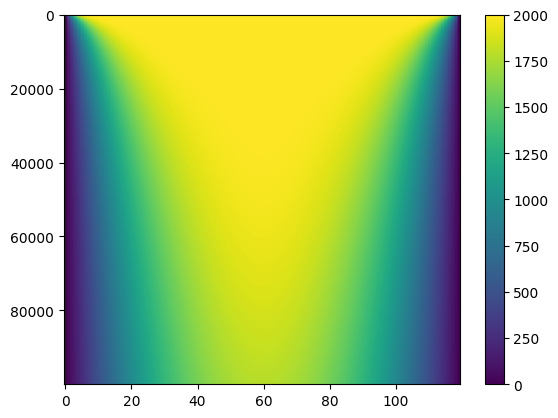

In [15]:
import matplotlib.pyplot as plt

imgplot = plt.imshow(Pexplicita,aspect='auto')
plt.colorbar()

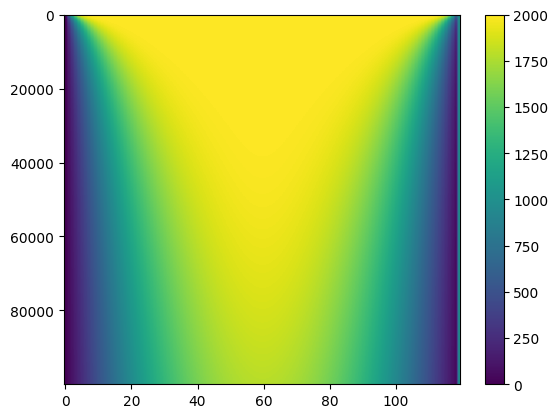

In [16]:
import matplotlib.pyplot as plt

imgplot = plt.imshow(Pimplicita,aspect='auto')
plt.colorbar()